In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

In [2]:
# Set Path
data = "../Data/super_bowl.csv"

# Read CSV
super_bowl = pd.read_csv(f"{data}")

# Clean Louisiana Data
super_bowl = super_bowl.replace("Mercedes-Benz Superdome", "Louisiana Superdome")

# Clean Louisiana Data
super_bowl = super_bowl.replace("Superdome", "Louisiana Superdome")

# Sort Values
super_bowl = super_bowl.sort_values(by=["State"]).reset_index()

# Get Unique State Values
states = list(super_bowl["State"].unique())

# Designate Colors
colors = ["tab:blue",
"tab:orange",
"tab:green",
"tab:red",
"tab:purple",
"tab:brown",
"tab:pink",
"tab:gray",
"tab:olive",
"tab:cyan"]

# Create DataFrame
colors_df = pd.DataFrame(list(zip(states, colors)), columns = ["State", "Color"])

# Merge DataFrames
super_bowl = super_bowl.merge(colors_df, how='inner', on='State')

# Count Stadium Values
bar_input = pd.DataFrame(super_bowl["Stadium"].value_counts())

# Reset Index
bar_input.reset_index(inplace=True)

# Rename Columns
bar_input.columns = ["Stadium", "Super Bowl Count"]

# Merge DataFrames
bar_input = super_bowl.merge(bar_input, how='inner', on='Stadium')

# Designate Columns to Keep
bar_input = bar_input[["State", "Stadium", "Super Bowl Count", "Color"]]

# Drop Duplicates
bar_input = bar_input.drop_duplicates()

# Sort Values
bar_input = bar_input.sort_values("Super Bowl Count", ascending=False).reset_index()

# Save Arizona Legend Value
Arizona = mlines.Line2D([], [], color='tab:blue', marker='s', linestyle='None',
                              markersize=10, label='Arizona')

# Save California Legend Value
California = mlines.Line2D([], [], color='tab:orange', marker='s', linestyle='None',
                              markersize=10, label='California')

# Save Florida Legend Value
Florida = mlines.Line2D([], [], color='tab:green', marker='s', linestyle='None',
                              markersize=10, label='Florida')

# Save Georgia Legend Value
Georgia = mlines.Line2D([], [], color='tab:red', marker='s', linestyle='None',
                              markersize=10, label='Georgia')

# Save Indiana Legend Value
Indiana = mlines.Line2D([], [], color='tab:purple', marker='s', linestyle='None',
                              markersize=10, label='Indiana')

# Save Louisiana Legend Value
Louisiana = mlines.Line2D([], [], color='tab:brown', marker='s', linestyle='None',
                              markersize=10, label='Louisiana')

# Save Michigan Legend Value
Michigan = mlines.Line2D([], [], color='tab:pink', marker='s', linestyle='None',
                              markersize=10, label='Michigan')

# Save Minnesota Legend Value
Minnesota = mlines.Line2D([], [], color='tab:gray', marker='s', linestyle='None',
                              markersize=10, label='Minnesota')

# Save New Jersey Legend Value
New_Jersey = mlines.Line2D([], [], color='tab:olive', marker='s', linestyle='None',
                              markersize=10, label='New Jersey')

# Save Texas Legend Value
Texas = mlines.Line2D([], [], color='tab:cyan', marker='s', linestyle='None',
                              markersize=10, label='Texas')

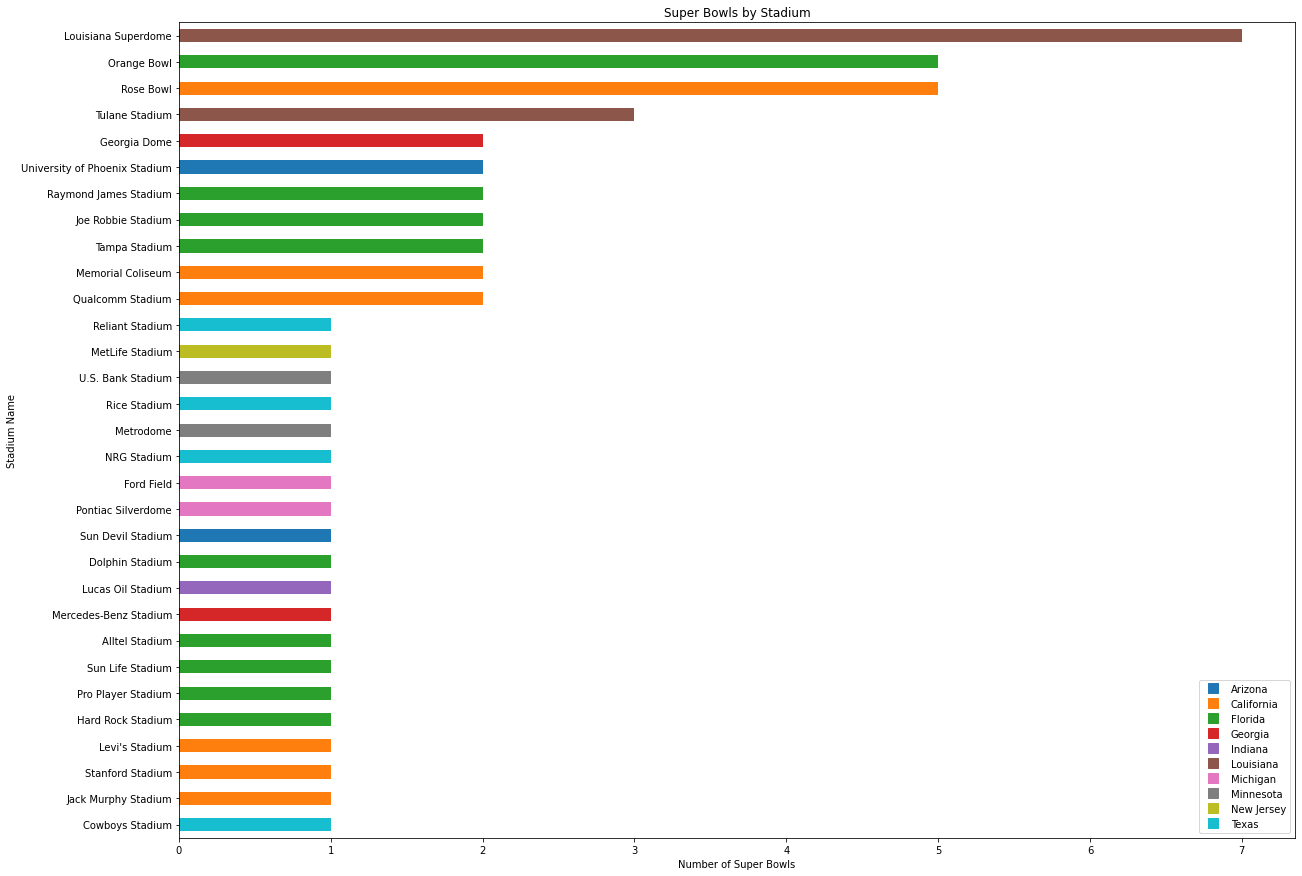

In [3]:
# Plot Stadiums
ax = bar_input.plot(kind="barh", x = "Stadium", y = "Super Bowl Count", color=list(bar_input["Color"]), figsize=(20,15), title = "Super Bowls by Stadium");

# Invert Y Axis
ax.invert_yaxis()

# Set Legend
plt.legend(handles=[Arizona, California, Florida, Georgia, Indiana, Louisiana, Michigan, Minnesota, New_Jersey, Texas]);

# Set Y Labels
ax.set_ylabel("Stadium Name");


# Set X Labels
ax.set_xlabel("Number of Super Bowls");

# Show Plot
plt.show();